<a href="https://colab.research.google.com/github/ElenaKapetanoudi/Machine-Learning-Exercise-10/blob/main/Exercise_10_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

## Import Libraries

In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN

## Question 1

### Load Dataset

In [33]:
df = pd.read_csv('dataset.csv')

df

,number,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Columns

In [34]:
df.columns

Index(['number', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

### Copy Dataset with Certain Columns

In [35]:
meta_columns = [
    'number',
    'track_id',
    'artists',
    'album_name',
    'track_name'
]

df_meta = df[meta_columns].copy()
df_meta


,number,track_id,artists,album_name,track_name
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On
...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends


### Remove Columns From Original Dataset

In [36]:
df_features = df.drop(columns=meta_columns)
df_features

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### One-Hot Encoding

In [37]:
df_features['track_genre'].nunique()

114

In [38]:
df_features = pd.get_dummies(df_features, columns=['track_genre'])
df_features.shape

(114000, 129)

## Question 2

### Standard Scaling

In [45]:
scaler = StandardScaler()

features_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(
    features_scaled,
    columns=df_features.columns
)

df_scaled


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,1.782627,0.024575,-0.305767,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
1,0.975633,-0.730859,-0.305767,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
2,1.065299,-0.160332,-0.305767,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
3,1.692961,-0.243214,-0.305767,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
4,2.186125,-0.271919,-0.305767,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-0.548691,1.462944,-0.305767,-2.274962,-1.615656,-0.086838,-1.617326,0.753988,-0.401507,0.977652,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,10.630146
113996,-0.503858,1.462953,-0.305767,-2.263437,-2.084789,-1.491343,-2.000082,-1.326281,-0.421369,2.042245,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,10.630146
113997,-0.503858,0.404827,-0.305767,0.358416,-1.241940,-1.491343,-0.524135,-1.326281,-0.403399,1.660315,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,10.630146
113998,0.347970,0.520646,-0.305767,0.116398,-0.538241,0.474964,-0.522942,0.753988,-0.519731,0.198754,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,10.630146


## Question 3

### K-Means

In [47]:
k_values = [2, 3, 5, 7, 10, 15, 20]
sse = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

sse

[14423469.60122247,
 14272096.79669281,
 14016358.565090658,
 13754396.968520751,
 13370978.958982483,
 12773647.16760151,
 12188704.398053043]

### K Line Plot

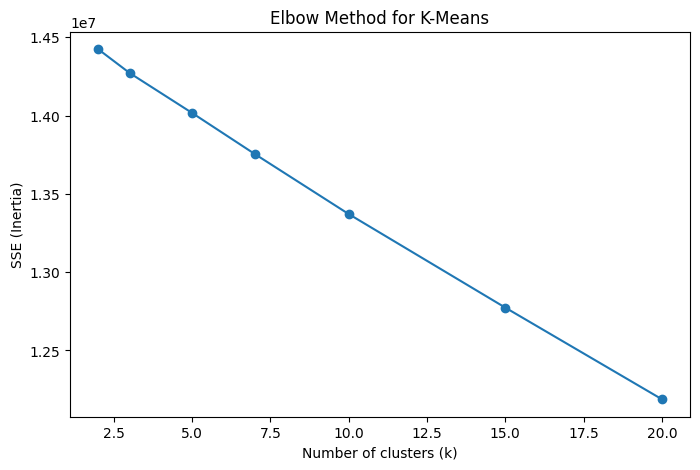

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for K-Means')
plt.show()

## Question 4

### K-Means For Optimal K

In [52]:
k_optimal = 10

kmeans_final = KMeans(
    n_clusters=k_optimal,
    random_state=42,
    n_init=10
)

kmeans_final.fit(df_scaled)

labels = kmeans_final.labels_
df_meta['cluster'] = labels
df_meta


,number,track_id,artists,album_name,track_name,cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,2
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,2
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,2
...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,3
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,3
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,5
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,5


## Question 5

### Genre Percentage

In [53]:
genre_columns = [col for col in df_features.columns if col.startswith('track_genre_')]

df_clusters_genres = df_features[genre_columns].copy()
df_clusters_genres['cluster'] = df_meta['cluster']
df_clusters_genres

,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,...,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,cluster
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,3
113996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,3
113997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,5
113998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,5


In [54]:
dominant_genres = []
dominant_percentages = []

for cluster_id in sorted(df_clusters_genres['cluster'].unique()):
    cluster_data = df_clusters_genres[df_clusters_genres['cluster'] == cluster_id]

    total_tracks = len(cluster_data)

    genre_counts = cluster_data[genre_columns].sum()

    dominant_genre = genre_counts.idxmax()
    dominant_count = genre_counts.max()

    percentage = (dominant_count / total_tracks) * 100

    dominant_genres.append(dominant_genre.replace('track_genre_', ''))
    dominant_percentages.append(percentage)

df_dominant = pd.DataFrame({
    'Cluster': sorted(df_clusters_genres['cluster'].unique()),
    'Dominant Genre': dominant_genres,
    'Percentage (%)': dominant_percentages
})

df_dominant


,Cluster,Dominant Genre,Percentage (%)
0,0,death-metal,15.515904
1,1,alt-rock,6.033183
2,2,cantopop,5.935775
3,3,sleep,12.434653
4,4,deep-house,7.727975
5,5,dub,5.196695
6,6,country,9.112448
7,7,alternative,7.111364
8,8,comedy,100.000000
9,9,breakbeat,12.690355


### Bar plot

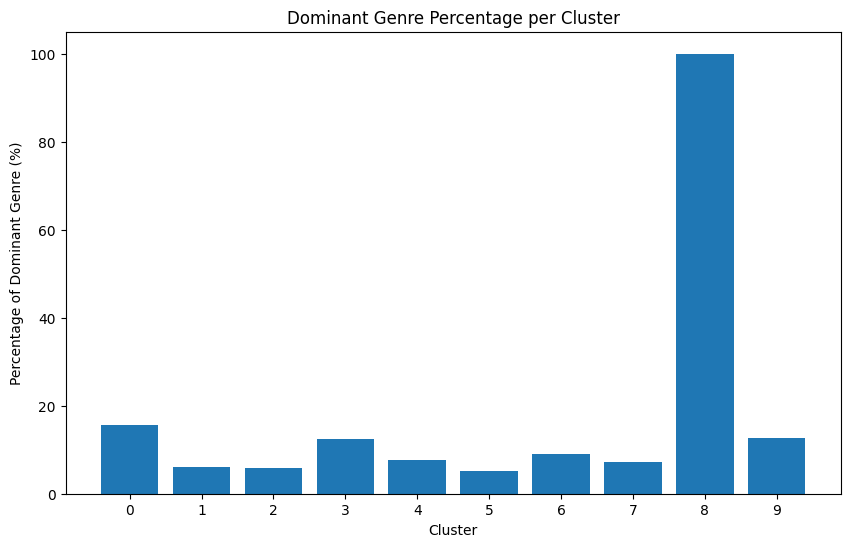

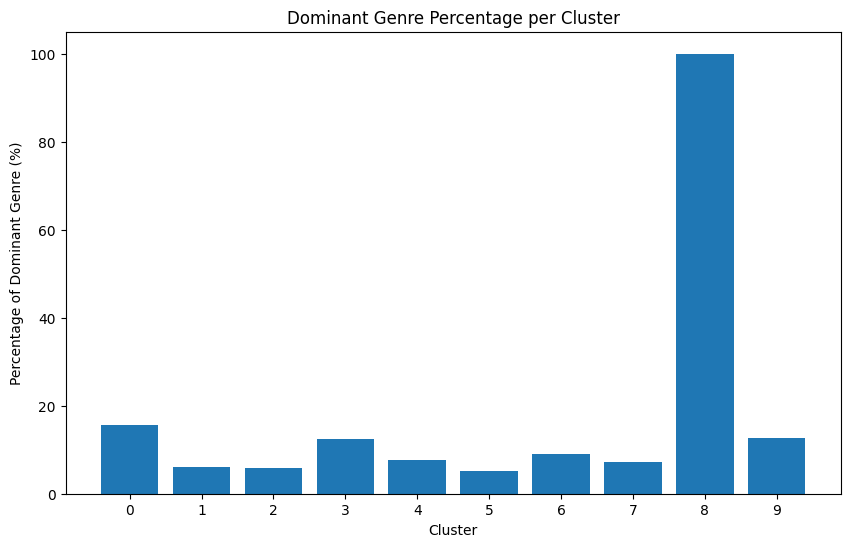

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(df_dominant['Cluster'], df_dominant['Percentage (%)'])
plt.xlabel('Cluster')
plt.ylabel('Percentage of Dominant Genre (%)')
plt.title('Dominant Genre Percentage per Cluster')
plt.xticks(df_dominant['Cluster'])
plt.show()

## Question 6

### Chosen Song Info

In [61]:
song_title = "Born To Die"

song_index = df_meta[df_meta['track_name'] == song_title].index[0]

song_info = df_meta.loc[song_index]
song_cluster = song_info['cluster']

song_info, song_cluster



(number                          81898
 track_id       5rLVwM5DvEWm1mFyUU32y4
 artists                  Lana Del Rey
 album_name    Halloween & Alternative
 track_name                Born To Die
 cluster                             1
 Name: 81898, dtype: object,
 np.int32(1))

### Euclidean Distances

In [64]:
cluster_indexes = df_meta[df_meta['cluster'] == song_cluster].index

song_vector = df_scaled.loc[song_index].values.reshape(1, -1)

cluster_vectors = df_scaled.loc[cluster_indexes]

distances = euclidean_distances(song_vector, cluster_vectors)[0]

distances


array([16.01831497, 16.02800193, 15.8345667 , ..., 16.05425698,
       17.42896744, 16.14904341])

### Smallest Distance Songs

In [66]:
df_distances = pd.DataFrame({
    'index': cluster_indexes,
    'distance': distances
})

df_distances = df_distances[df_distances['index'] != song_index]

top_3 = df_distances.nsmallest(3, 'distance')

recommendations = df_meta.loc[top_3['index']][
    ['track_name', 'artists', 'cluster']
]

recommendations


,track_name,artists,cluster
81679,West Coast,Lana Del Rey,1
81511,Tu Banke Hawa,Jubin Nautiyal,1
81443,Dangerous,David Guetta;Sam Martin,1


### Observation

Επιλέχθηκε το τραγούδι Born To Die της Lana Del Rey, το οποίο ανήκει στο cluster 1.
Για την παραγωγή προτάσεων, υπολογίστηκε η Ευκλείδεια απόσταση του επιλεγμένου τραγουδιού με όλα τα υπόλοιπα τραγούδια του ίδιου cluster, χρησιμοποιώντας τα κανονικοποιημένα χαρακτηριστικά.
Ως Top-3 παρόμοια τραγούδια επιλέχθηκαν εκείνα με τη μικρότερη Ευκλείδεια απόσταση και αυτά είναι τα 	West Coast της Lana Del Rey, το Tu Banke Hawa του Jubin Nautiyal	και το Dangerous του	David Guetta.
Από τα προτεινόμενα τραγούδια, μόνο το πρώτο θεωρώ ότι παρουσιάζει παρόμοιο ύφος και ρυθμό με το αρχικό κομμάτι, καθώς ανήκει και στην ίδια καλλιτέχνιδα, ενώ τα υπόλοιπα θεωρώ ότι ανήκουν σε άλλο είδο και δεν αποτελούν ταιριαστές μουσικές προτάσεις.

## Question 7

### Cosine Distances

In [72]:
song_vector = df_scaled.loc[song_index].values.reshape(1, -1)

cluster_vectors = df_scaled.loc[cluster_indexes]

cos_sim = cosine_similarity(song_vector, cluster_vectors)[0]

cos_dist = 1 - cos_sim

cos_dist

array([1.02414934, 1.03275773, 1.00130845, ..., 1.02198451, 1.01762138,
       1.02200184])

### Smallest Distance Songs

In [73]:
df_cosine = pd.DataFrame({
    'index': cluster_indexes,
    'cosine_distance': cos_dist
})

df_cosine = df_cosine[df_cosine['index'] != song_index]

top_3_cosine = df_cosine.nsmallest(3, 'cosine_distance')

recommendations_cosine = df_meta.loc[
    top_3_cosine['index']
][['track_name', 'artists', 'cluster']]

recommendations_cosine


,track_name,artists,cluster
81679,West Coast,Lana Del Rey,1
81511,Tu Banke Hawa,Jubin Nautiyal,1
81443,Dangerous,David Guetta;Sam Martin,1


### Observation

Η διαδικασία σύστασης επαναλήφθηκε χρησιμοποιώντας την Cosine Distance (1 – Cosine Similarity) ως μετρική απόστασης. Παρατηρήθηκε ότι τα προτεινόμενα τραγούδια ήταν τα ίδια με εκείνα που προέκυψαν με τη χρήση της Ευκλείδειας απόστασης. Από τα τρία προτεινόμενα κομμάτια, μόνο το ένα θεωρήθηκε, κατά την προσωπική μου κρίση, ιδιαίτερα ταιριαστό με το αρχικό τραγούδι.
Το αποτέλεσμα αυτό υποδεικνύει ότι, στο συγκεκριμένο σύνολο δεδομένων και με δεδομένο τον περιορισμό της αναζήτησης εντός του ίδιου cluster, η αλλαγή της μετρικής απόστασης δεν οδηγεί σε ουσιαστική βελτίωση της ποιότητας των συστάσεων.

## Question 8

### Observation

Στην παρούσα εργασία, η επιλογή του αριθμού των clusters πραγματοποιήθηκε εξαρχής με τη χρήση του Elbow Method. Για τον λόγο αυτό, η διαδικασία που περιγράφεται στα ερωτήματα 4, 5, 6, 7, 8 και 10 βασίστηκε στον ίδιο αριθμό clusters, ο οποίος προέκυψε από την ανάλυση της μετρικής SSE.

## Question 9

### DBSCAN

In [77]:
dbscan = DBSCAN(
    eps=5,
    min_samples=10,
    metric='euclidean'
)

db_labels = dbscan.fit_predict(df_scaled)

### Remove Noise

In [93]:
unique_clusters = set(db_labels)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

num_clusters


115

### Observation

Στη συνέχεια εφαρμόστηκε ο αλγόριθμος DBSCAN για την ομαδοποίηση των δεδομένων, χωρίς εκ των προτέρων καθορισμό του αριθμού των clusters. Ο DBSCAN εντόπισε μεγαλύτερο αριθμό clusters σε σύγκριση με τον K-Means, ενώ ένα ποσοστό των μουσικών κομματιών χαρακτηρίστηκε ως θόρυβος (noise).
Σε σύγκριση με τα αποτελέσματα των ερωτημάτων 4 και 8, όπου ο K-Means με επιλογή του k μέσω Elbow Method παρήγαγε περίπου 10 clusters, ο DBSCAN οδήγησε σε πιο συντηρητική ομαδοποίηση. Το αποτέλεσμα αυτό υποδεικνύει ότι ο DBSCAN δυσκολεύεται σε δεδομένα υψηλών διαστάσεων, όπως αυτά που προκύπτουν από One-Hot Encoding των genres.

## Question 10

### DBSCAN++

In [92]:
dbscanpp = DBSCANpp(
    eps=5,
    min_samples=15,
    metric='euclidean'
)

dbpp_labels = dbscanpp.fit_predict(df_scaled)

NameError: name 'DBSCANpp' is not defined

### Observation

Έγινε προσπάθεια εφαρμογής του αλγορίθμου DBSCAN++, ωστόσο η διαθέσιμη
υλοποίηση απαιτεί compilation (C++/Cython) και δεν εκτελείται απευθείας
στο περιβάλλον του Google Colab. Για τον λόγο αυτό, ο DBSCAN++ δεν
εκτελέστηκε πρακτικά στο παρόν notebook.

Παρόλα αυτά, σε θεωρητικό επίπεδο, ο DBSCAN++ αποτελεί βελτιωμένη
παραλλαγή του DBSCAN και αναμένεται να μειώνει τον κατακερματισμό των
clusters που παρατηρήθηκε στο ερώτημα 9, οδηγώντας σε πιο συνεκτική
ομαδοποίηση των δεδομένων.